In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221215_ann_thu.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-16 01:00:00,#ナインティナインANN,75296536,rock_it_61
1,2022-12-16 01:00:00,#ナインティナインANN,1334708791527395328,zutoharu
2,2022-12-16 01:00:00,1時！！ #ナインティナインANN,2298246204,kouji4334
3,2022-12-16 01:00:00,#ナインティナインANN,89400309,kogarasumaru0
4,2022-12-16 01:00:01,#ナインティナインANN,1039877226664054784,conan_drill
...,...,...,...,...
1615,2022-12-16 03:03:35,ボーナス支給日だ！ #頑張れ受験生 #エイブル #ナインティナインANN #ナイナイ合格祈願...,75296536,rock_it_61
1616,2022-12-16 03:03:36,俺の着てるダウン軽すぎて着たら体重ちょっと減んねんww #ナインティナインANN,784321230,503227
1617,2022-12-16 03:04:35,ちなみに「中途半端やなぁ」と言ってたのは富好じゃなくて大西のほう #ナインティナインAN...,727870597682712576,onkoh_ando
1618,2022-12-16 03:04:41,来週は12/22は #岡１グランプリ 再来週12/29は年内ラスト恒例の #出川哲郎 さん...,1126862746874597376,tosshiimaru


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-16 01:00:00,120
1,2022-12-16 01:01:00,34
2,2022-12-16 01:02:00,31
3,2022-12-16 01:03:00,9
4,2022-12-16 01:04:00,15
...,...,...
120,2022-12-16 03:00:00,17
121,2022-12-16 03:01:00,16
122,2022-12-16 03:02:00,3
123,2022-12-16 03:03:00,3


In [4]:
filename =  "count_221215_ann_thu.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(120, 0)

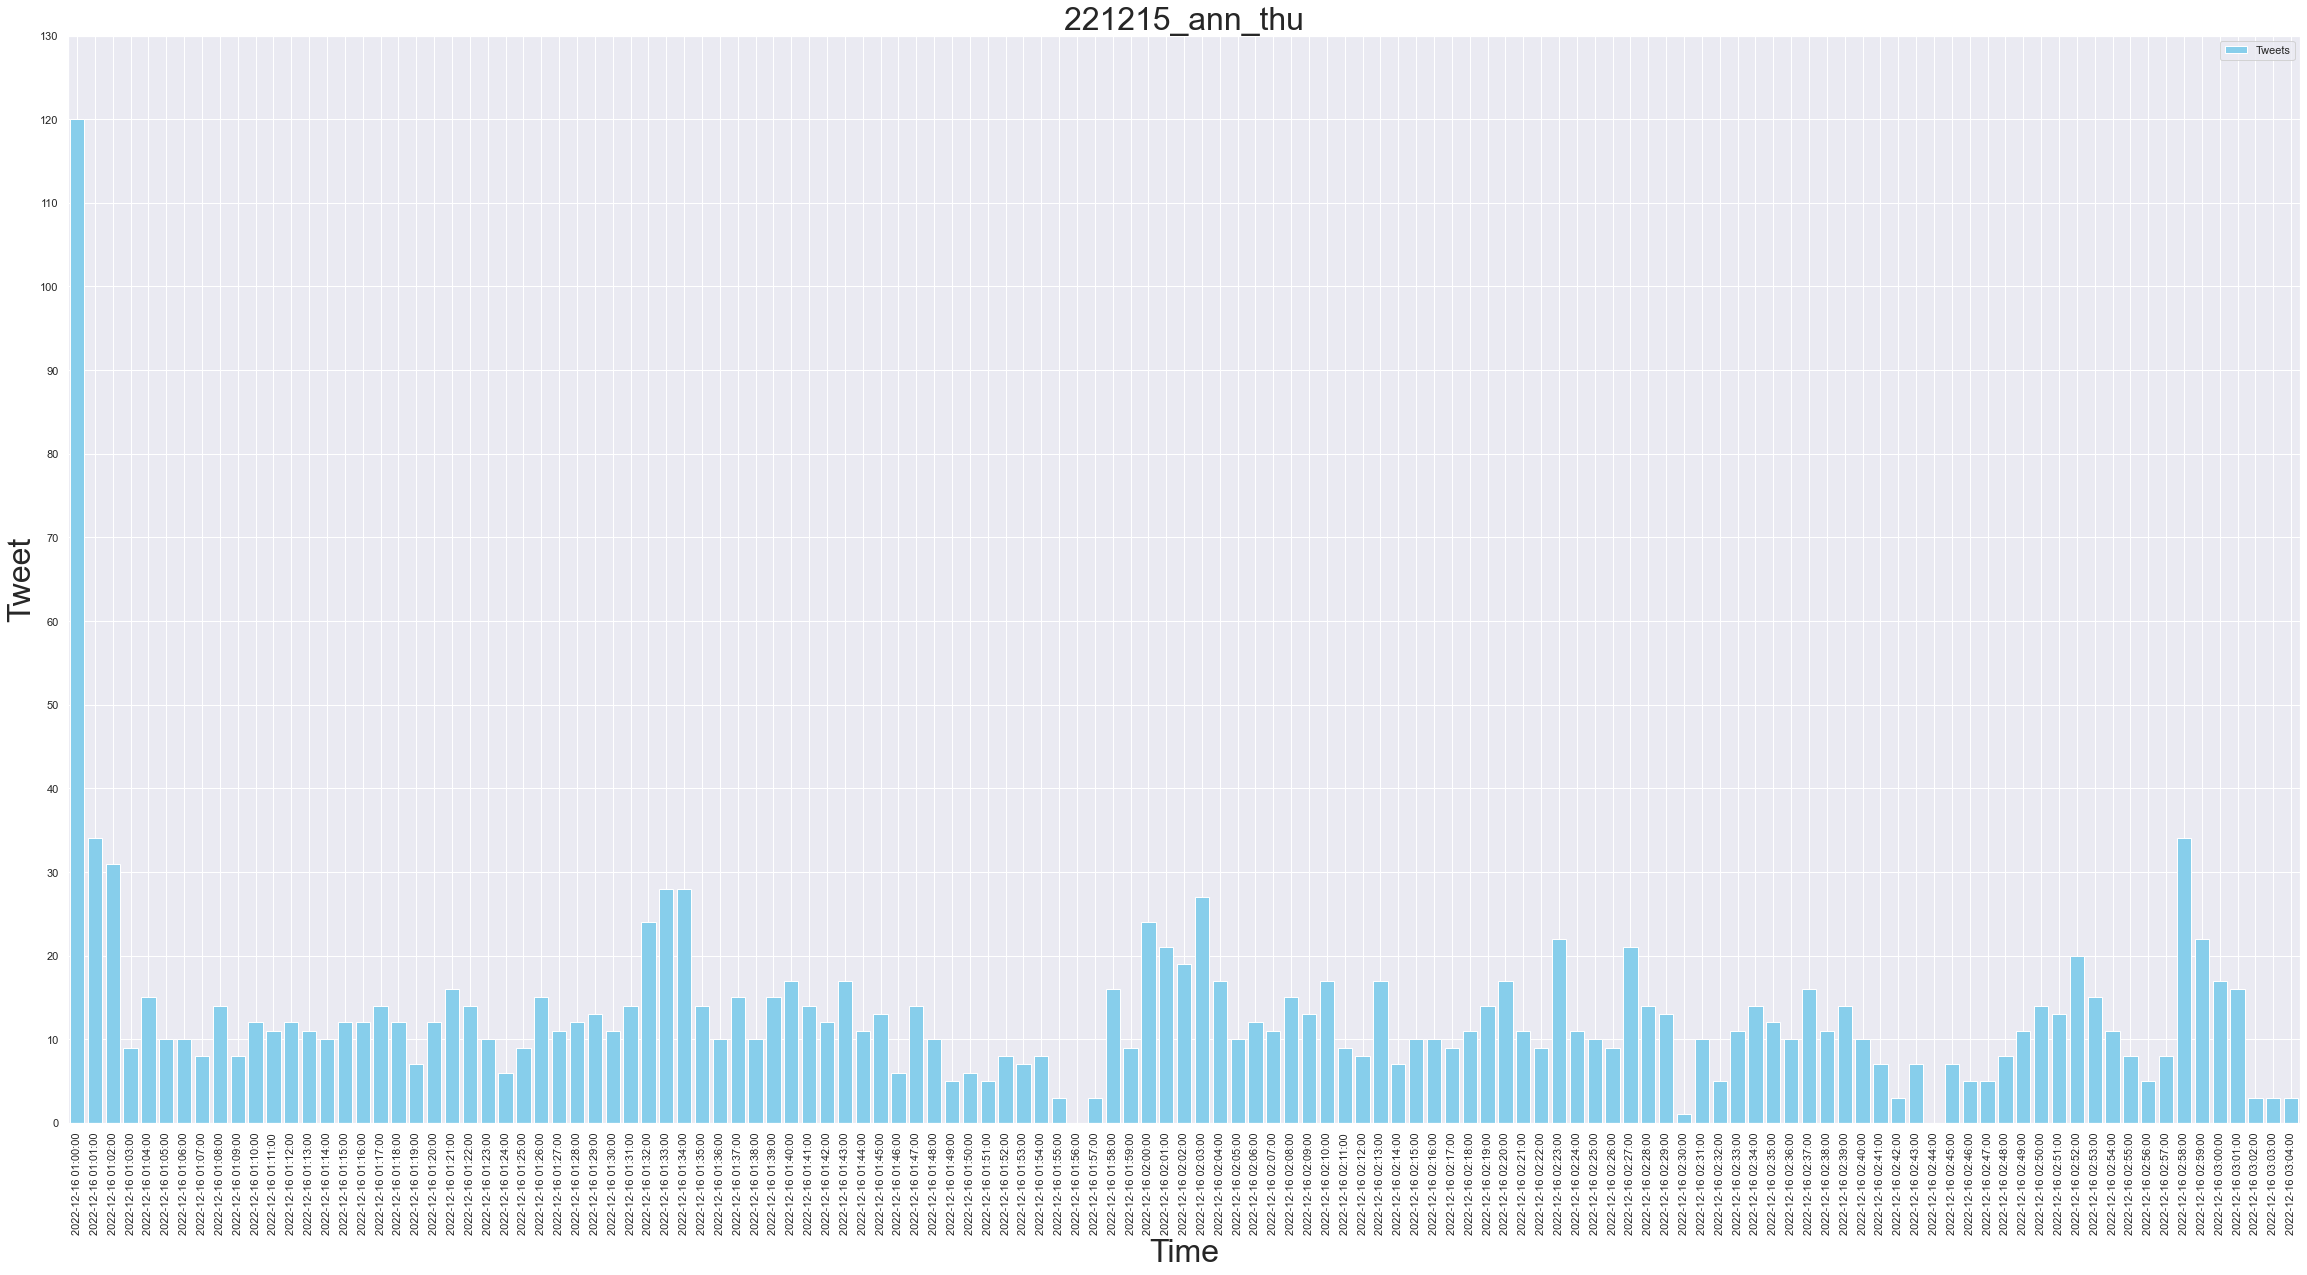

In [7]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221215_ann_thu", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 130) # y軸の範囲を指定する
start = 0
end = 131
stepsize = 10
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")